## Support Vector Machine (SVM)
A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

### Befor going to SVM work first know some genral things:

 - 1. Support Vector
 - 2. Hyper Plane
 - 3. Marginal Distance
 - 4. Kernel
 - 5. Linear and Non Linear Separable Data
 
1. Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane.

2. Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.

3. Marginal Distance is the two parallel line that create w.r.t most near point of +ve and -ve to plane distance. we always maximise the marginal distance.

- See the below figure you better understood all these three term.

<img src="6.png">

4.  The function of kernel is to take data as input and transform it into the required form. Different SVM algorithms use different types of kernel functions. These functions can be different types. For example linear, nonlinear, polynomial, radial basis function (RBF), and sigmoid.

To Know More About Kernel click this:https://data-flair.training/blogs/svm-kernel-functions/#:~:text=SVM%20Kernel%20Functions,it%20into%20the%20required%20form.&text=For%20example%20linear%2C%20nonlinear%2C%20polynomial,(RBF)%2C%20and%20sigmoid.

- Below i demonstrate linear and non linear separable dataset.

### Linear Separable data

<img src="01.png" width="300">

- Suppose you have a dataset as shown above and you need to classify the red rectangles from the blue.  So your task is to find an ideal line that separates this dataset in two classes.

- It is not so difficult as i learnt before when there is a linear separable data set you just draw a line with the help of linear regression then it will be separable easily.

<img src="02.png" width="300">

- Two lines here, the green colored line and the yellow colored line. Which line according to you best separates the data?

- If you selected the yellow line then it correct , because thats the line we are looking for. It’s visually quite intuitive in this case that the yellow line classifies better. But, we need something concrete to fix our line.

- Here we see how linear regrssion separate the dataset. Now Times to see How SVM find the best line.

- According to the SVM algorithm that find the points closest to the line from both the classes.These points are called support vectors. Now, we compute the distance between the line and the support vectors. 
- This distance is called the margin. Our goal is to maximize the margin. The hyperplane for which the margin is maximum is the optimal hyperplane.

<img src="03.png" width="500">




### No-Linear Separable Data

- SVM Can work both linear and non- linear dataset. above i dicuss about how svm works in linear data now dicuss about works in non linear data.

<img src="4.png">

- Now consider what if we had data as shown in image below? This is a type of non linear data. Clearly See, there is no line that can separate the two classes in this x-y plane. So what do we do?
- We apply transformation and add one more dimension as we call it z-axis. Lets assume value of points on z plane, w = x² + y² - So, basically z co-ordinate is the square of distance of the point from origin. Let’s plot the data on z-axis.. 

- After Transform 
<img src="5.png">

- These Transform Done By SVM kernels.

## Math Intution About SVM

<img src="7.jpg" width="500"> <img src="8.jpg" width="500">


## Let's Do an Example

In [1]:
## Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the SVM model on the Training set

In [5]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## Predicting the Test set results

In [6]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[66  2]
 [ 8 24]]


## Visualising the Training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


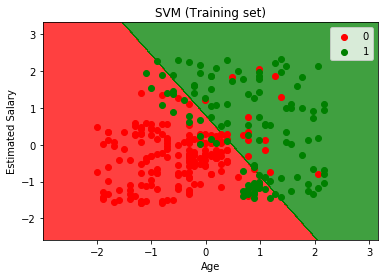

In [8]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


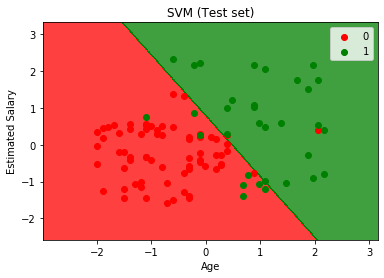

In [9]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()